In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("C:/Users/haoyuan/Documents/GitHub/XRaySimulation/")
from XRaySimulation import util

In [45]:
photonEnergyKeV = 10  
k0 = util.kev_to_wavevec_length(photonEnergyKeV)

gratingK = np.pi * 2 / 1. 
TGK = np.pi * 2 / (1.2e-3)

delta = np.arcsin(TGK / 2 / k0) / 2
print("delta1 = {:.2f} deg".format(np.rad2deg(delta)))

delta1 = 1.48 deg


In [46]:
11 * util.c

3.2977170380000005

In [29]:
photonEnergyKeV = 10  
k0 = util.kev_to_wavevec_length(photonEnergyKeV)

gratingK = np.pi * 2 / 1. 
TGK = np.pi * 2 / (5e-3)

delta = np.arcsin(gratingK / k0)
print("delta1 = {:.2f} mdeg".format(np.rad2deg(delta) * 1000))

angleTmp = np.arcsin(TGK / k0 / 2)
theta2 = (angleTmp + delta) / 2
print("delta1 = {:.2f} mdeg".format(np.rad2deg(theta2)))

theta1 = np.deg2rad(0.1)

# define the nominal values of several distances
l1 = 5e6
l2 = 6e6
l3 = (l2 - l1 * np.cos(2 * delta)) / np.cos(2 * theta1 - 2 * delta) #(np.sin(delta * 2) / np.sin(np.pi - theta1 * 2) * l2)
print(l3 / 1e6)
l4 = 2e6
def getL5L7(delta_, theta2_, l2_, l4_, eta_):
    return ((eta_ * np.cos(delta_ - 2*theta2_) + (-l2_ + l4_) * np.sin(delta_ - 2*theta2_))/np.sin(2*theta2_), 
            - (eta_ * np.cos(delta_) + (-l2_ + l4_) * np.sin(delta_))/np.sin(2*theta2_))

l5, l7 = getL5L7(delta_=delta, theta2_=theta2, l2_=l2, l4_=l4, eta_=0)
print(l5 / 1e6, l7 / 1e6)

def getL7EtagivenL5(delta_, theta2_, l2_, l4_, l5_):
    return (l5_ * np.sin(2 * theta2_) / np.cos(delta_ - 2 * theta2_) + (l2_ - l4_)* np.tan(delta_ - 2 * theta2_), 
            -((-l2_ + l4_ + l5_ * np.cos(delta_)) / np.cos(delta_ - 2 * theta2_)))

# Separation between the two pusles
separate = 2 * 2e6 * np.tan(delta)
print(separate / 1000)

###################################
#   Get alignment error undertainty
###################################

# alignment error of the overlap of the two pulses
etaScan = np.linspace(-3, 3, 30)

# Sample installation error with respect to the scintillator
l2Scan = np.linspace(-100, 100,30)

# Mirror angle alignment error
theta2Scan = np.deg2rad(np.random.rand(100) * 0.02 - 0.01) * 2
theta3Scan = np.deg2rad(np.random.rand(100) * 0.02 - 0.01) * 2

# Path length info for each branch
pathInfoB1 = np.zeros((etaScan.shape[0], theta2Scan.shape[0], l2Scan.shape[0], 4))
pathInfoB2 = np.zeros((etaScan.shape[0], theta3Scan.shape[0], l2Scan.shape[0], 4))

for etaIdx in range(etaScan.shape[0]):
    
    # Initial alignment
    # The two light path might have different theta angle
    for thetaIdx in range(theta2Scan.shape[0]):
        l5tmp, l7tmp = getL5L7(delta_=delta, 
                               theta2_=theta2 + theta2Scan[thetaIdx], 
                               l2_=l2,
                               l4_=l4,
                               eta_=0.0)
        
        l6tmp, l8tmp = getL5L7(delta_=delta, 
                               theta2_=theta2 + theta3Scan[thetaIdx], 
                               l2_=l2,
                               l4_=l4,
                               eta_=etaScan[etaIdx])
        
        # Switching back to the sample, there may be alignment error in l2
        for l2Idx in range(l2Scan.shape[0]):
            # Get the eta and the l7
            etaTmp1, l7tmp = getL7EtagivenL5(delta_=delta,
                                            theta2_=theta2 + theta2Scan[thetaIdx],
                                            l2_=l2 + l2Scan[l2Idx],
                                            l4_=l4,
                                            l5_=l5tmp)
            
            etaTmp2, l8tmp = getL7EtagivenL5(delta_=delta,
                                             theta2_=theta2 + theta3Scan[thetaIdx],
                                             l2_=l2 + l2Scan[l2Idx],
                                             l4_=l4,
                                             l5_=l6tmp)

            # Assign the value to the test path
            pathInfoB1[etaIdx, thetaIdx, l2Idx, 0] = l5tmp
            pathInfoB1[etaIdx, thetaIdx, l2Idx, 1] = l7tmp
            pathInfoB1[etaIdx, thetaIdx, l2Idx, 2] = etaTmp1
            pathInfoB1[etaIdx, thetaIdx, l2Idx, 3] = l5tmp + l7tmp
            
            pathInfoB2[etaIdx, thetaIdx, l2Idx, 0] = l6tmp
            pathInfoB2[etaIdx, thetaIdx, l2Idx, 1] = l8tmp
            pathInfoB2[etaIdx, thetaIdx, l2Idx, 2] = etaTmp2
            pathInfoB2[etaIdx, thetaIdx, l2Idx, 3] = l6tmp + l8tmp

delta1 = 7.10 mdeg
delta1 = 0.36 mdeg
1.000005411264225
3.960399083698607 0.03960399083698607
0.495936793362202


In [30]:
l1 * np.cos(delta * 2) + l3 * np.cos(2 * theta1 - 2 * delta)

6000000.0

In [31]:
(l4 + l5 + l7 - l1 - l3) / util.c

-7.794487716961782

In [13]:
pathLengthDiff = pathInfoB2[:,:,:,3] - pathInfoB1[:,:,:,3]
pathLengthDiff = np.reshape(pathLengthDiff, np.prod(pathLengthDiff.shape))

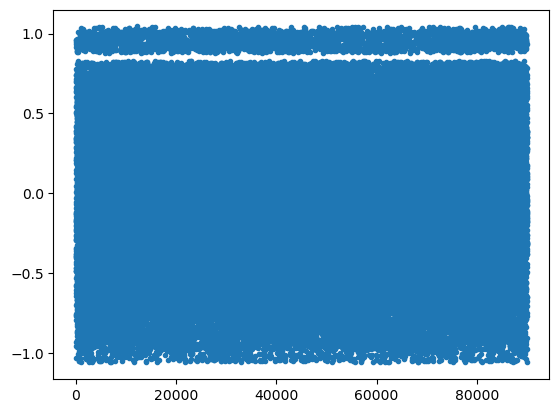

In [14]:
np.random.shuffle(pathLengthDiff)
plt.plot(pathLengthDiff/util.c, '.')
plt.show()

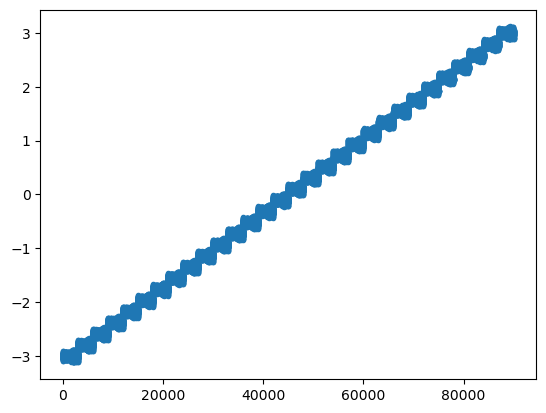

In [15]:
positionDifference = pathInfoB2[:,:,:,2] - pathInfoB1[:,:,:,2]
positionDifference = np.reshape(positionDifference, np.prod(positionDifference.shape))

plt.plot(positionDifference, '.')
plt.show()